# `Multithreading and Multiprocessing in python`
***

### Points to cover this
***
<ul>
    <li>Program</li>
    <li>Process</li>
    <li>Threads</li>
    <li>Examples of process and thread</li>
</ul>


### Program
***
Program is sequence of instruction to be executed, written in programming languages.
`ex:-` Google chrome --> .exe <--Program--> Browser should work.

### Process
***
A Process is simply an instance of a program that is being executed.<br>
`Example:- ` Each browser is instance of a large program.<br>
Each process will have separate memory space.<br>
It wont corrupt another process.<br>
`* Increased execution to switch between processes`

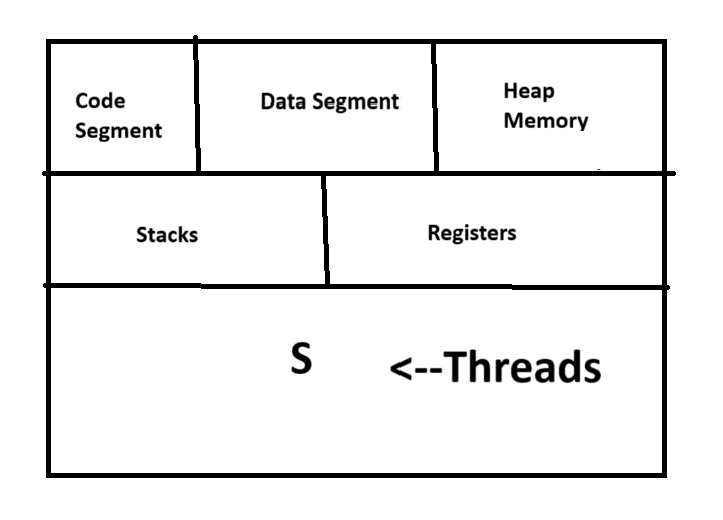

### Threads
***
A thread is unit of execution with a process or light weight process.

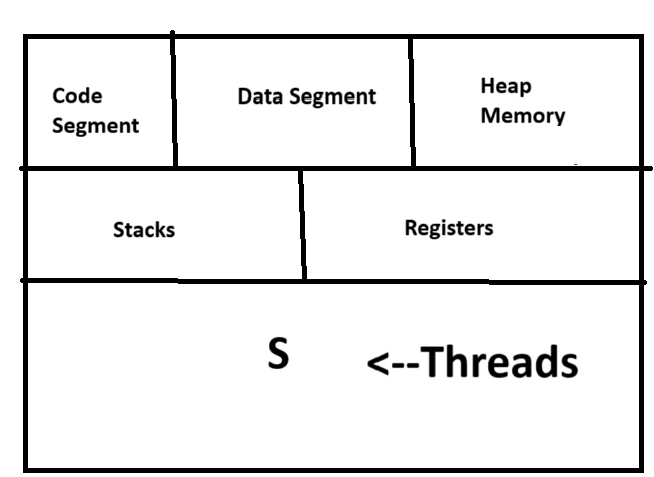

<br>Single thread is called single threaded and multiple threads are called multi-threaded

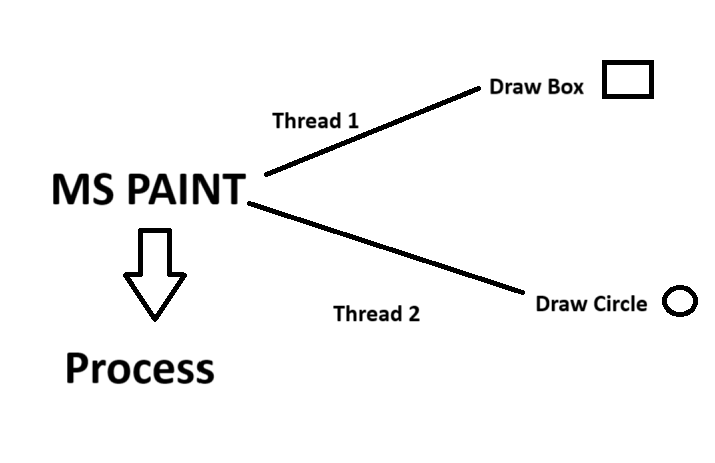

# Multithreading practical uses in python
***

In [11]:
import threading
import time as time

def print_numbers():
    for i in range(5):
        time.sleep(2)
        print(f"Number {i}")

def print_letters():
    for letter in "abcdefghijklmnopq":
        time.sleep(2)
        print(f"Letter {letter}")

t1 = threading.Thread(target=print_numbers) # create thread of a function suppose 
t2 = threading.Thread(target=print_letters)
start = time.time()
t1.start() # to start the thread
t2.start() 
t1.join() # to join with the main thread (main process)
t2.join()
end = time.time() - start
print(end)

Number 0
Letter a
Number 1Letter b

Number 2Letter c

Number 3Letter d

Number 4Letter e

Letter f
Letter g
Letter h
Letter i
Letter j
Letter k
Letter l
Letter m
Letter n
Letter o
Letter p
Letter q
34.01350212097168


# Multiprocessing practical uses in python
***
Processes that run in parallel
<br> CPU-bound tasks-Tasks that are heavy on CPU usage (e.g., Mathematical computations, data processing etc.)
<br> Parallel execution: Multiple cores of the CPU

In [ ]:
# Multiprocessing does not work in IDE
import time
import multiprocessing

def square_number():
    for i in range(1, 6):
        time.sleep(1)
        print(f"Square: {i*i}")

def cube_number():
    for i in range(1,6):
        time.sleep(2)
        print(f"Cube: {i**3}")
if __name__ == "__main__":
    p1 = multiprocessing.Process(target=square_number)
    p2 = multiprocessing.Process(target=cube_number)
    start = time.time()
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    end = time.time() - start
    print(end)

0.11560869216918945


### Multithreading with thread pool executor
***
#### Used in advanced applications to manage threads.

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import time

def print_number(number):
    time.sleep(2)
    return f"Number: {number}"

numbers = [1,2,3,4,5]
start = time.time()
with ThreadPoolExecutor(max_workers=3) as executor:
    result = executor.map(print_number, numbers)
end = time.time() - start
print("Time take to complete ", end)
for number in result:
    print(number)

Time take to complete  4.001281261444092
Number: 1
Number: 2
Number: 3
Number: 4
Number: 5


### Multiprocessing with ProcessPoolExecutor
***
#### Used in advanced applications to manage multi core processors.

In [ ]:
# Do not run it on Jupyter, create separate .py file and run it.
from concurrent.futures import ProcessPoolExecutor
import time

def cubeOfNumber(number):
    time.sleep(2)
    return f"Cube: {number**3}"

if __name__ == "__main__":
    numbers = [1,2,3,4,5]
    start = time.time()
    with ProcessPoolExecutor(max_workers=3) as executor:
        results = executor.map(cubeOfNumber,numbers)
    end = time.time()-start
    print(f"Time taken to complete: {end}")
    for result in results:
        print(result)

Time taken to complete: 0.15943527221679688


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

### Real world example: Multithreading for I/O-bound Tasks
***
Scenario: `Web scraping`
<br> Web scraping often involves making numerous network requests to fetch web pages. These tasks are I/O-bound because they spend a lot of time waiting for responses from servers.
<br> Multithreading can significantly improve the performance by allowing multiple web pages to be fetched concurrently.

In [ ]:
import requests
import threading
from bs4 import BeautifulSoup
import time
urls = [
    'https://en.wikipedia.org/wiki/Node.js',
    'https://en.wikipedia.org/wiki/Marathi_people',
    'https://en.wikipedia.org/wiki/Maratha_Empire'
]

def fetch(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    print(f"Fetched {len(soup.text)} characters from {url}")
start = time.time()
for url in urls:
    fetch(url)
end = time.time() - start
print("Time take to execute without threads", end)

threads = []
start = time.time()
for url in urls:
   thread = threading.Thread(target=fetch, args=(url,))
   threads.append(thread)
   thread.start()


for thread in threads:
   thread.join()
end = time.time() - start
print("Time take to execute with threads", end)

print("All web pages fetched")

Fetched 30093 characters from https://en.wikipedia.org/wiki/Node.js
Fetched 114948 characters from https://en.wikipedia.org/wiki/Marathi_people
Fetched 96680 characters from https://en.wikipedia.org/wiki/Maratha_Empire
Time take to execute without threads 1.0735561847686768
Fetched 30093 characters from https://en.wikipedia.org/wiki/Node.js
Fetched 114948 characters from https://en.wikipedia.org/wiki/Marathi_people
Fetched 96680 characters from https://en.wikipedia.org/wiki/Maratha_Empire
Time take to execute with threads 0.8282468318939209
All web pages fetched


### Real world example: Multiprocessing for CPU-bound Tasks
***
Scenario: `Factorial calculations`
<br> Factorial calculations especially for large numbers, involve significant computational work.
<br> Multiprocessing can be used to distribute the workload across multiple CPU cores, improving performance.

In [ ]:
import time
import math
import sys
import multiprocessing

sys.set_int_max_str_digits(100000)

def computeFactorial(number):
    print(f"Computing factorial of {number}")
    result = math.factorial(number)
    print(f"Factorial of {number} is {result}")
    return result

numbers = [5000,6000,700,8000]

start = time.time()
for number in numbers:
    computeFactorial(number)
end = time.time()-start
print(f"Time take to execute without multiprocessing is {end}")

start = time.time()
with multiprocessing.Pool() as pool:
    results = pool.map(computeFactorial,numbers)
for result in results:
    print(result)
end = time.time()-start    
print(f"Time take to execute with multiprocessing is {end}")

Computing factorial of 5000
Factorial of 5000 is 422857792660554352220106420023358440539078667462664674884978240218135805270810820069089904787170638753708474665730068544587848606668381273633721089377278763127939036305846216064390447898698223987192970889621161265296832177550039924219683703146907264472878789790404754884162215226671928410969236910449565971736352948400223840381120644820230857671104502306174894755428309761781724040805324809927809328784055486199364548291211876258248802189173977900050213212598043639244626460770511358846595108675470585833924655225589035474435988347383178988034633008458631510209091509935653820010933047965742556741930917055172805200236075085991197635228755907902043369743123506916831211924495971556267407521462198986233088625998302859864857578749445963115286970886710046268423648178989905454690861391613218344174148807186234448114831209490361196546872767755617886828720269104814092456410341835975604276458161513178575901661071782544156980883359372729995603371371200471